Use this url: https://colab.to/r

In [ ]:
print(installed.packages())

In [5]:
# To read the mnist dataset:
mnist1 <- read.csv("/content/sample_data/mnist_train_small.csv", header=T)

In [ ]:
head(mnist1)

In [ ]:
cancer1 <- read.csv("/content/sample_data/cancer.csv", header=T)
head(cancer1)

In [6]:
# install.packages("keras")
library(keras)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# A DEEP LEARNING EXAMPLE:

In [ ]:
# Data: right click on raw on github and save as csv and run code for bar plot
data <- read.csv('/content/sample_data/Cardiotocographic.csv', header=T)
data$NSP <- data$NSP -1
barplot(prop.table(table(data$NSP)),
        col = rainbow(3),
        ylim = c(0, 0.8),
        ylab = 'Proportion',
        xlab = 'NSP',
        cex.names = 1.5)

In [ ]:
head(data)

In [10]:
# Matrix
data <- as.matrix(data)
dimnames(data) <- NULL  

# Normalize 
data[,1:21] <- normalize(data[,1:21])

# Partition
set.seed(1234)
ind <- sample(2, nrow(data), replace = T, prob=c(.7, .3))
training <- data[ind==1, 1:21]
test <- data[ind==2, 1:21]
trainingtarget <- data[ind==1, 22]
testtarget <- data[ind==2, 22]

# One hot encoding 
trainLabels <- to_categorical(trainingtarget)
testLabels <- to_categorical(testtarget)

# Creat sequential model and add layers 
model <- keras_model_sequential()
model %>%  layer_dense(units = 8, activation = 'relu', input_shape = c(21)) %>%   
  layer_dense(units = 3, activation = 'softmax') 
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 8)                       176         
 dense (Dense)                      (None, 3)                       27          
Total params: 203
Trainable params: 203
Non-trainable params: 0
________________________________________________________________________________


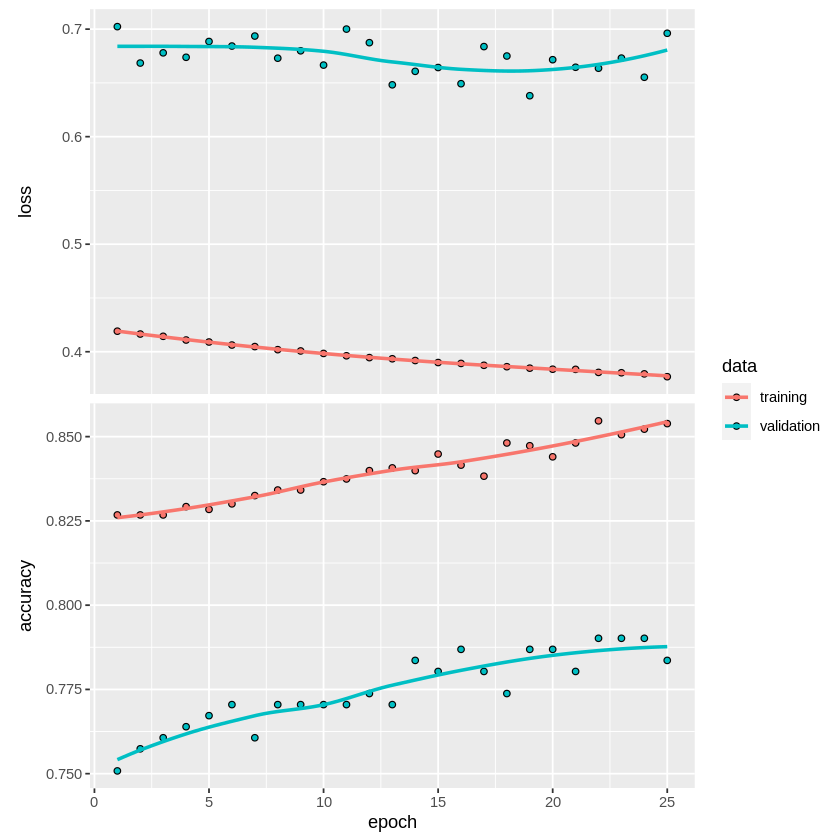

In [12]:
# Compile 
model %>% compile(loss = 'categorical_crossentropy', 
  optimizer = 'adam',
  metrics = 'accuracy')

# Fit 
fit <- model %>%   
  fit(training, 
  trainLabels, 
  epochs = 25,
  batch_size = 8, 
  validation_split = 0.2)
  plot(fit)


In [13]:
# Evaluate 
model %>%  evaluate(test, testLabels)  

# Prediction 
pred <- model %>% 
  predict_classes(test)
table(Predicted=pred, Actual=testtarget)

loss  accuracy 
0.4464025 0.8407960

Warning message in predict_classes(., test):
“`predict_classes()` is deprecated and and was removed from tensorflow in version 2.6.
Please update your code:
  * If your model does multi-class classification:
    (e.g. if it uses a `softmax` last-layer activation).

      model %>% predict(x) %>% k_argmax()

  * if your model does binary classification
    (e.g. if it uses a `sigmoid` last-layer activation).

      model %>% predict(x) %>% `>`(0.5) %>% k_cast("int32")
”


ERROR: ignored